|<h2>Course:</h2>|<h1><a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">A deep understanding of AI language model mechanisms</a></h1>|
|-|:-:|
|<h2>Part 1:</h2>|<h1>Tokenizations and embeddings<h1>|
|<h2>Section:</h2>|<h1>Embedding spaces<h1>|
|<h2>Lecture:</h2>|<h1><b>CodeChallenge: GPT2 cosine similarities<b></h1>|

<br>

<h5><b>Teacher:</b> Mike X Cohen, <a href="https://sincxpress.com" target="_blank">sincxpress.com</a></h5>
<h5><b>Course URL:</b> <a href="https://udemy.com/course/dullms_x/?couponCode=202508" target="_blank">udemy.com/course/dullms_x/?couponCode=202508</a></h5>
<i>Using the code without the course may lead to confusion or errors.</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import GPT-2 model and extract its embedding matrix

In [2]:
from transformers import GPT2Model,GPT2Tokenizer

# pretrained GPT-2 model and tokenizer
gpt2 = GPT2Model.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

c:\Users\marco\workspace\LLM_course\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# get the Word Token Embeddings matrix
embeddings = gpt2.wte.weight.detach().numpy()

# Exercise 1: The cosmic banana

In [4]:
# words of interest
word1 = 'banana'
word2 = 'apple'
word3 = 'cosmic'

# decomposition
for w in [word1,word2,word3]:
  t = tokenizer.encode(w)
  print(f'"{w}" comprises {len(t)} tokens:\n   {[tokenizer.decode(i) for i in t]}\n')

"banana" comprises 2 tokens:
   ['ban', 'ana']

"apple" comprises 1 tokens:
   ['apple']

"cosmic" comprises 2 tokens:
   ['cos', 'mic']



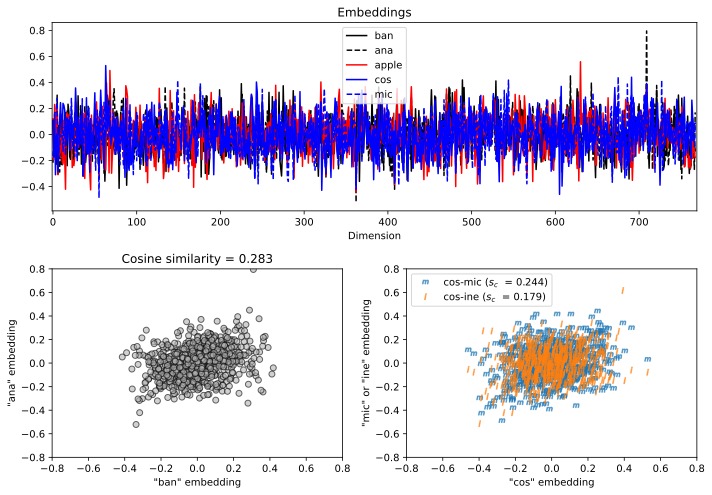

In [5]:
# setup the figure subplot geometry
fig = plt.figure(figsize=(10,7))
gs = GridSpec(2,2)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[1,1])


# plot the embeddings by dimension
colors = 'krb'
linestyles = ['-','--','-.',':']
for idx,word in enumerate([word1,word2,word3]):
  wordidx = tokenizer.encode(word)
  for j in range(len(wordidx)):
    ax0.plot(embeddings[wordidx[j],:],linestyle=linestyles[j],color=colors[idx],label=tokenizer.decode(wordidx[j]))

ax0.set(xlabel='Dimension',title='Embeddings',xlim=[-1,embeddings.shape[1]+1])
ax0.legend()



# cosine similarity between 'ban' and 'ana'
v1 = embeddings[tokenizer.encode('ban')]
v2 = embeddings[tokenizer.encode('ana')]
cossim = np.sum(v1*v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

# plot the embeddings by each other
ax1.plot(v1,v2,'ko',markerfacecolor=[.7,.7,.7,.6])
ax1.set(xlim=[-.8,.8],ylim=[-.8,.8],xlabel='"ban" embedding',ylabel='"ana" embedding',
        title=f'Cosine similarity = {cossim:.3f}')



# plot the "cos" for two endings
for s in ['mic','ine']:

  # cosine similarity
  v1 = embeddings[tokenizer.encode('cos')].squeeze()
  v2 = embeddings[tokenizer.encode(s)].squeeze()
  cossim = np.sum(v1*v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))

  # plot
  ax2.plot(v1,v2,marker=f'${s[0]}$',linestyle='none',alpha=.6,label=f'cos-{s} ($s_c$  = {cossim:.3f})')

ax2.legend(fontsize=10)
ax2.set(xlim=[-.8,.8],ylim=[-.8,.8],xlabel='"cos" embedding',ylabel='"mic" or "ine" embedding')


# final touches
plt.tight_layout()
plt.show()

# Exercise 2: Find tokens with similar embeddings

In [6]:
# get seed index and embedding vector
seed = tokenizer.encode('Mike')
seedvect = embeddings[seed].squeeze()
seedvectNorm = np.linalg.norm(seedvect)

# calculate cosine similarity to all other tokens in a for-loop
cossims = np.zeros(embeddings.shape[0])
for idx,v in enumerate(embeddings):
  cossims[idx] = np.sum(seedvect*v) / (seedvectNorm*np.linalg.norm(v))



# and visualize
plt.figure(figsize=(10,4))
plt.plot(cossims,'k.',alpha=.6,markerfacecolor='w')
plt.gca().set(xlim=[-5,len(cossims)+5],xlabel='Token index',ylabel='Cosine similarity',
              title='Cosine similarity to "Mike"')


# top 20 largest cosine-similarities
top20 = np.argsort(cossims)[-20:]
for i in top20:
  plt.plot(i,cossims[i],'ms',markersize=4,alpha=.6)

plt.show()

In [7]:
# tokens closest to "Mike"
for n in top20[::-1]:
  print(f'"{tokenizer.decode(n)}" with cosine similarity {cossims[n]:.3f}')

"Mike" with cosine similarity 1.000
" Mike" with cosine similarity 0.857
"Michael" with cosine similarity 0.685
"Chris" with cosine similarity 0.647
"Jim" with cosine similarity 0.640
"Dave" with cosine similarity 0.626
"Steve" with cosine similarity 0.615
"Joe" with cosine similarity 0.612
"Brian" with cosine similarity 0.607
"Kevin" with cosine similarity 0.597
" Michael" with cosine similarity 0.590
"Rick" with cosine similarity 0.585
"Jason" with cosine similarity 0.584
"Larry" with cosine similarity 0.578
"Andy" with cosine similarity 0.575
"Doug" with cosine similarity 0.570
"Jeff" with cosine similarity 0.570
"Richard" with cosine similarity 0.569
"Jerry" with cosine similarity 0.568
"Josh" with cosine similarity 0.566


# Exercise 3: One-to-all cosine similarity via linear algebra

In [8]:
# normalize entire embedding matrix (in a new variable!)
Enorm = embeddings / np.linalg.norm(embeddings,axis=1,keepdims=True)

# cosine similarity matrices
cossims2 = Enorm[seed] @ Enorm.T

In [9]:
print(f'Size of for-loop version:   {cossims.shape}')
print(f'Size of vectorized version: {cossims2.shape}')

# remove singleton dimension
cossims2 = np.squeeze(cossims2)

# inspect again
print('\n** After squeezing:')
print(f'Size of for-loop version:   {cossims.shape}')
print(f'Size of vectorized version: {cossims2.shape}')

Size of for-loop version:   (50257,)
Size of vectorized version: (1, 50257)

** After squeezing:
Size of for-loop version:   (50257,)
Size of vectorized version: (50257,)


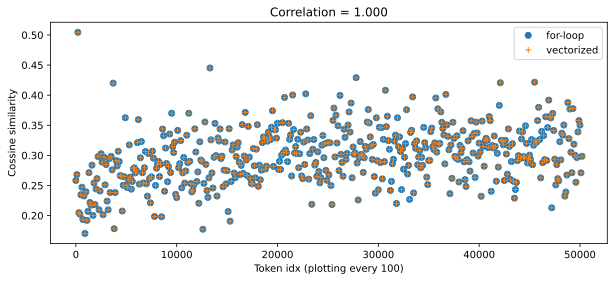

In [10]:
plt.figure(figsize=(10,4))
plt.plot(range(0,len(cossims),100),cossims[::100],'o',label='for-loop')
plt.plot(range(0,len(cossims),100),cossims2[::100],'+',label='vectorized')

plt.legend()
plt.gca().set(xlabel='Token idx (plotting every 100)',ylabel='Cossine similarity',title=f'Correlation = {np.corrcoef(cossims,cossims2)[0,1]:.3f}')
plt.show()